<a href="https://colab.research.google.com/github/Muskan786786/TSF_Task3/blob/master/TSF_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task_3_Unsupervised_Machine_Learning**


*   By Muskan M Patel
*   From the given ‘Iris’ dataset, To predict the optimum number of clusters and represent it visually. ### Import the relevant libraries




In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

Loading The **Dataset**

In [8]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

Viewing the **Dataset**

In [11]:
iris_data.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [12]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


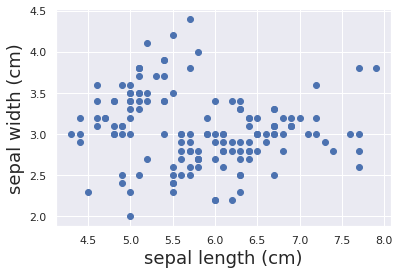

In [14]:
#Visualising the relationship between features
plt.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_data)
plt.xlabel('sepal length (cm)', fontsize=18)
plt.ylabel('sepal width (cm)', fontsize=18)
plt.show()

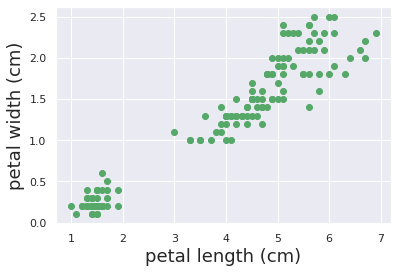

In [15]:
plt.scatter(x = 'petal length (cm)', y = 'petal width (cm)', data = iris_data, color='g')
plt.xlabel('petal length (cm)', fontsize=18)
plt.ylabel('petal width (cm)', fontsize=18)
plt.show()


In [17]:
# Using Elbow method to find K
wcss=[]
k_range=12
for i in range(1,k_range):
    k=KMeans(i)
    k.fit(iris_data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.066035353535355,
 34.299712121212124,
 30.06459307359308,
 28.252528195488722,
 26.29510562211155,
 24.86602999236746]

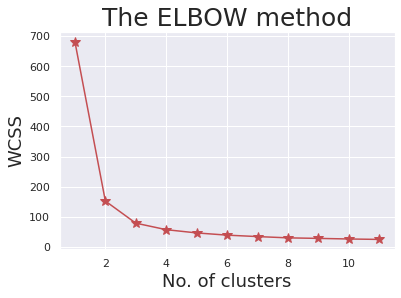

In [24]:
clusters=range(1,k_range)
plt.plot(clusters,wcss,  marker='*', color = "r", markersize=10)
plt.xlabel('No. of clusters', fontsize=18)
plt.ylabel('WCSS', fontsize=18)
plt.title('The ELBOW method', fontsize=25)
plt.show()

In [26]:
# K = 2 Clusters
kmeans_2=KMeans(2)
kmeans_2.fit(iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
iris_pred_2=iris_data.copy()
iris_pred_2['predicted']=kmeans_2.fit_predict(iris_data)

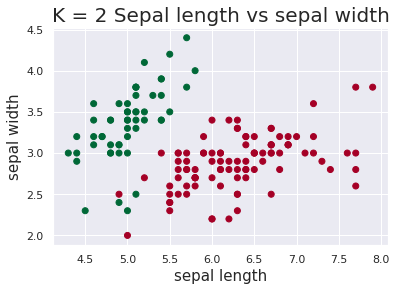

In [30]:
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap = 'RdYlGn', data=iris_pred_2)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('K = 2 Sepal length vs sepal width', fontsize=20)
plt.show()

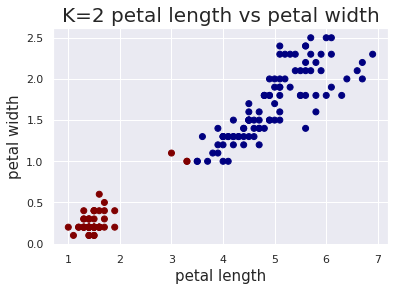

In [31]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap = 'jet', data=iris_pred_2)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('K=2 petal length vs petal width', fontsize=20)
plt.show()

In [32]:
# K = 3 Clusters
kmeans_3=KMeans(3)
kmeans_3.fit(iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
iris_pred_3=iris_data.copy()
iris_pred_3['predicted']=kmeans_3.fit_predict(iris_data)

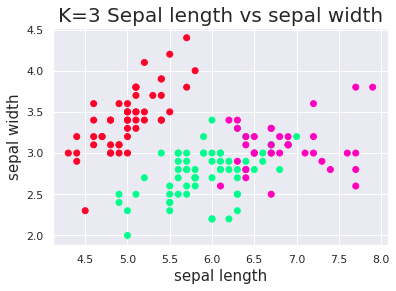

In [35]:
#Visualising Visualizing clusters according to predicted values
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap = 'gist_rainbow', data=iris_pred_3)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('K=3 Sepal length vs sepal width', fontsize=20)
plt.show()

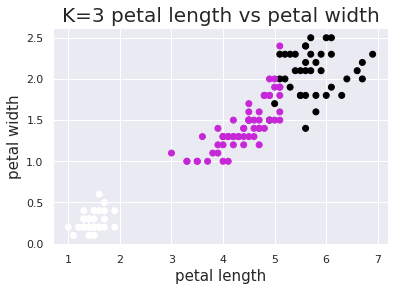

In [36]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap = 'gnuplot2_r', data=iris_pred_3)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('K=3 petal length vs petal width', fontsize=20)
plt.show()

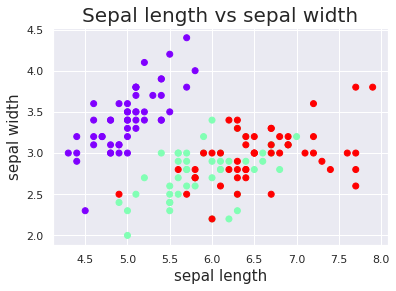

In [37]:
#Visualizing clusters for true label values
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap = 'rainbow', data=iris_data)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('Sepal length vs sepal width', fontsize=20)
plt.show()

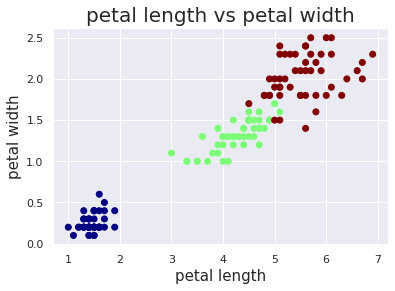

In [38]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c=iris.target, cmap = 'jet', data=iris_data)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('petal length vs petal width', fontsize=20)
plt.show()

Note: Visualizing the clusters for true labels ,we can say that K=3 is more appropriate solution for iris dataset. Examining the scatter plots (petal length vs petal width) and (sepal length vs sepal width), we observe the features that differentiate the species better, are petals features and not sepals features

Thus, KMeans is better suited for problems where the number of clusters are already known.